## Useful functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from main import *

## One run plots:

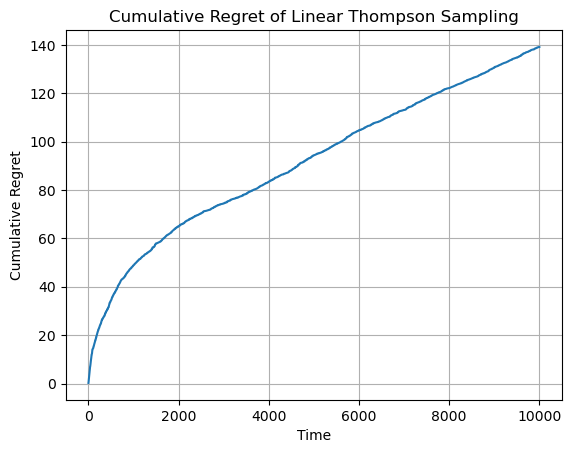

Total number of iterations in calculate.mle :  14313.0
Average number of iteration per rounds in calculate.mle:  1.4313


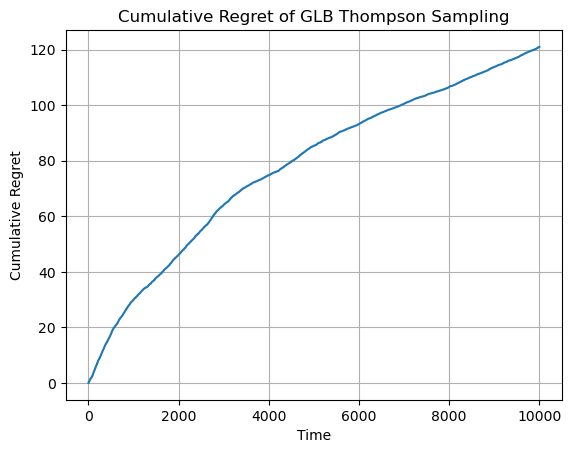

In [2]:
# Initialize the environment and the bandit.
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0

# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))

# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d

regrets, errors = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'linear')
plot_regret(regrets, "Cumulative Regret of Linear Thompson Sampling")

num_rounds = 10000
regrets2, errors2 = run_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, alpha=1, type = 'logistic')
plot_regret(regrets2, "Cumulative Regret of GLB Thompson Sampling")

## Linear Bandit over 100 runs

Total progress:   0%|          | 0/100 [00:00<?, ?it/s]

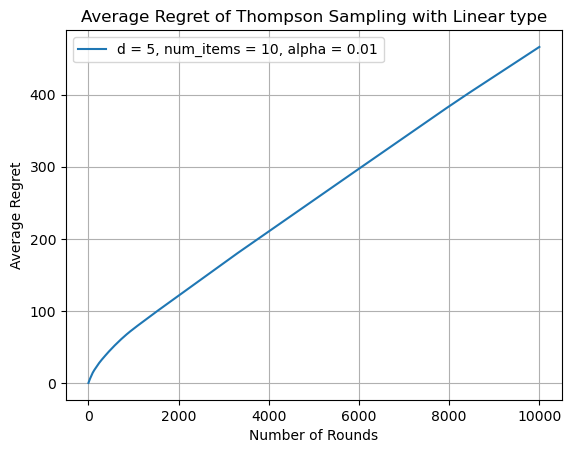

In [3]:
# Setup
d_values = [5]
num_items = [10]
alpha_values = [0.01]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 100
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'linear')

## Generalized Linear Bandit over 50 runs

Total progress:   0%|          | 0/10 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11238.0
Average number of iteration per rounds in calculate.mle:  1.1238
Total number of iterations in calculate.mle :  11262.0
Average number of iteration per rounds in calculate.mle:  1.1262
Total number of iterations in calculate.mle :  10976.0
Average number of iteration per rounds in calculate.mle:  1.0976
Total number of iterations in calculate.mle :  13630.0
Average number of iteration per rounds in calculate.mle:  1.363
Total number of iterations in calculate.mle :  10940.0
Average number of iteration per rounds in calculate.mle:  1.094
Total number of iterations in calculate.mle :  12191.0
Average number of iteration per rounds in calculate.mle:  1.2191
Total number of iterations in calculate.mle :  11897.0
Average number of iteration per rounds in calculate.mle:  1.1897
Total number of iterations in calculate.mle :  11194.0
Average number of iteration per rounds in calculate.mle:  1.1194
Total number of iterations in calculate.ml

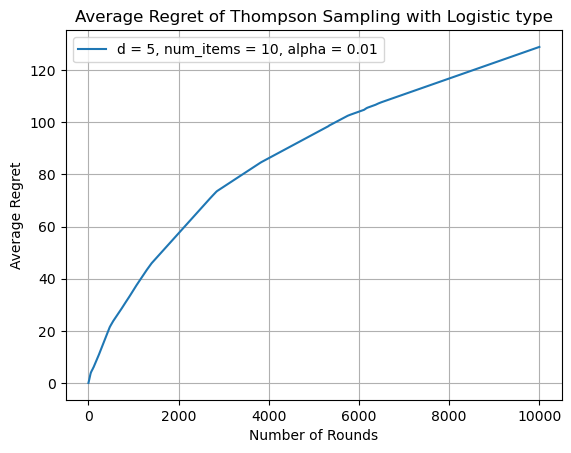

In [4]:
# Setup
d_values = [5]
num_items = [10]
alpha_values = [0.01]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 10
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'logistic')

## Varying parameters

### Variation of the number of dimensions

Total progress:   0%|          | 0/40 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  12499.0
Average number of iteration per rounds in calculate.mle:  1.2499
Total number of iterations in calculate.mle :  11019.0
Average number of iteration per rounds in calculate.mle:  1.1019
Total number of iterations in calculate.mle :  13816.0
Average number of iteration per rounds in calculate.mle:  1.3816
Total number of iterations in calculate.mle :  13210.0
Average number of iteration per rounds in calculate.mle:  1.321
Total number of iterations in calculate.mle :  12019.0
Average number of iteration per rounds in calculate.mle:  1.2019
Total number of iterations in calculate.mle :  11061.0
Average number of iteration per rounds in calculate.mle:  1.1061
Total number of iterations in calculate.mle :  11996.0
Average number of iteration per rounds in calculate.mle:  1.1996
Total number of iterations in calculate.mle :  11739.0
Average number of iteration per rounds in calculate.mle:  1.1739
Total number of iterations in calculate.m

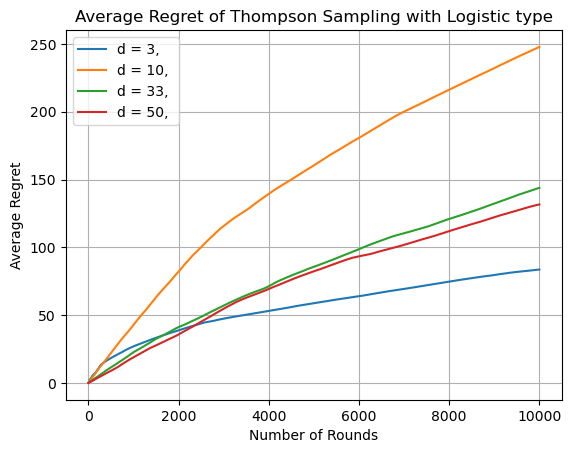

In [7]:
d_values = [3, 10, 33, 50]
num_items = [20]
alpha_values = [0.1]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 10
all_average_regrets = run_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs, type= 'logistic')

### Variation of the number of items

Total progress:   0%|          | 0/50 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  1029.0
Average number of iteration per rounds in calculate.mle:  2.058
Total number of iterations in calculate.mle :  1025.0
Average number of iteration per rounds in calculate.mle:  2.05
Total number of iterations in calculate.mle :  1025.0
Average number of iteration per rounds in calculate.mle:  2.05
Total number of iterations in calculate.mle :  1030.0
Average number of iteration per rounds in calculate.mle:  2.06
Total number of iterations in calculate.mle :  1031.0
Average number of iteration per rounds in calculate.mle:  2.062
Total number of iterations in calculate.mle :  1018.0
Average number of iteration per rounds in calculate.mle:  2.036
Total number of iterations in calculate.mle :  1041.0
Average number of iteration per rounds in calculate.mle:  2.082
Total number of iterations in calculate.mle :  1026.0
Average number of iteration per rounds in calculate.mle:  2.052
Total number of iterations in calculate.mle :  1023.0
Avera

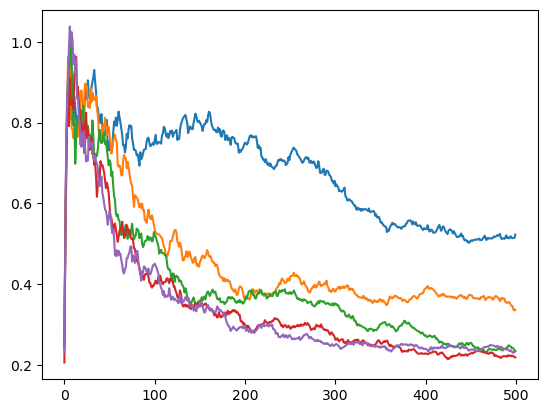

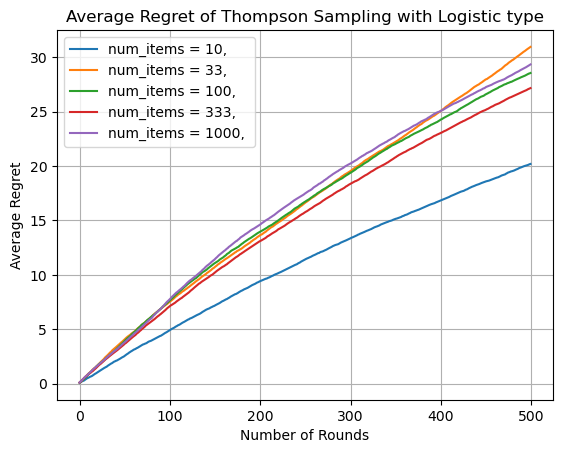

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


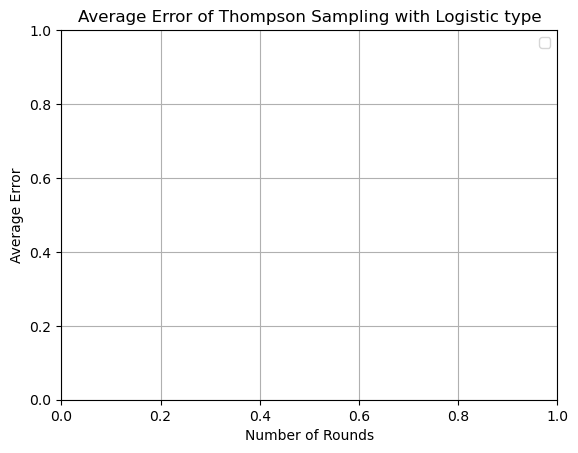

In [2]:
d_values2 = [5]
num_items2 = [10, 33, 100, 333, 1000]
alpha_values2 = [1]
num_rounds2 = 500
sigma_noise2 = 1.0
nbr_runs2 = 10

all_average_regrets = run_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2, type= 'logistic')

Total progress:   0%|          | 0/250 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11727.0
Average number of iteration per rounds in calculate.mle:  1.1727
Total number of iterations in calculate.mle :  11252.0
Average number of iteration per rounds in calculate.mle:  1.1252
Total number of iterations in calculate.mle :  12092.0
Average number of iteration per rounds in calculate.mle:  1.2092
Total number of iterations in calculate.mle :  11450.0
Average number of iteration per rounds in calculate.mle:  1.145
Total number of iterations in calculate.mle :  10913.0
Average number of iteration per rounds in calculate.mle:  1.0913
Total number of iterations in calculate.mle :  10953.0
Average number of iteration per rounds in calculate.mle:  1.0953
Total number of iterations in calculate.mle :  10993.0
Average number of iteration per rounds in calculate.mle:  1.0993
Total number of iterations in calculate.mle :  12109.0
Average number of iteration per rounds in calculate.mle:  1.2109
Total number of iterations in calculate.m

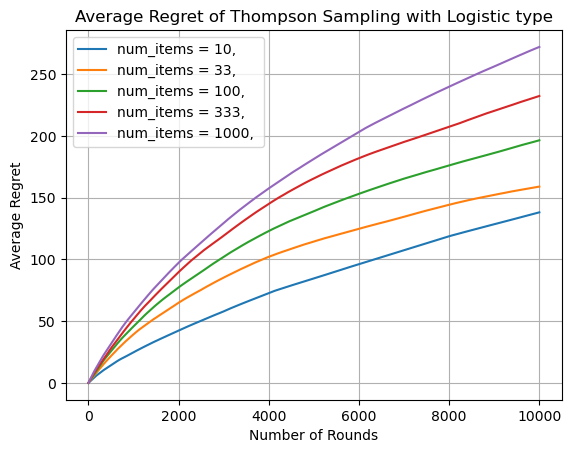

In [5]:
d_values2 = [10]
num_items2 = [10, 33, 100, 333, 1000]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 50

all_average_regrets = run_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2, type= 'logistic')

### Variation of the number of alphas

Total progress:   0%|          | 0/200 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11322.0
Average number of iteration per rounds in calculate.mle:  1.1322
Total number of iterations in calculate.mle :  10702.0
Average number of iteration per rounds in calculate.mle:  1.0702
Total number of iterations in calculate.mle :  11304.0
Average number of iteration per rounds in calculate.mle:  1.1304
Total number of iterations in calculate.mle :  10916.0
Average number of iteration per rounds in calculate.mle:  1.0916
Total number of iterations in calculate.mle :  11583.0
Average number of iteration per rounds in calculate.mle:  1.1583
Total number of iterations in calculate.mle :  11062.0
Average number of iteration per rounds in calculate.mle:  1.1062
Total number of iterations in calculate.mle :  10959.0
Average number of iteration per rounds in calculate.mle:  1.0959
Total number of iterations in calculate.mle :  10889.0
Average number of iteration per rounds in calculate.mle:  1.0889
Total number of iterations in calculate.

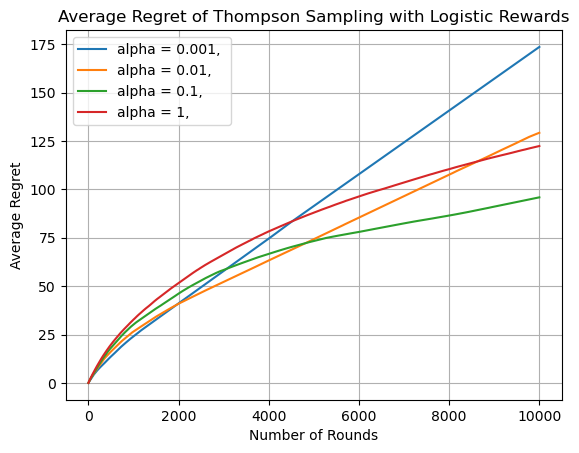

In [4]:
d_values3 = [5]
num_items3 = [10]
alpha_values3 = [0.001, 0.01, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 50

all_average_regrets = run_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3, type= 'logistic')

Total progress:   0%|          | 0/200 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11748.0
Average number of iteration per rounds in calculate.mle:  1.1748
Total number of iterations in calculate.mle :  11511.0
Average number of iteration per rounds in calculate.mle:  1.1511
Total number of iterations in calculate.mle :  11827.0
Average number of iteration per rounds in calculate.mle:  1.1827
Total number of iterations in calculate.mle :  12204.0
Average number of iteration per rounds in calculate.mle:  1.2204
Total number of iterations in calculate.mle :  11603.0
Average number of iteration per rounds in calculate.mle:  1.1603
Total number of iterations in calculate.mle :  11504.0
Average number of iteration per rounds in calculate.mle:  1.1504
Total number of iterations in calculate.mle :  11089.0
Average number of iteration per rounds in calculate.mle:  1.1089
Total number of iterations in calculate.mle :  12549.0
Average number of iteration per rounds in calculate.mle:  1.2549
Total number of iterations in calculate.

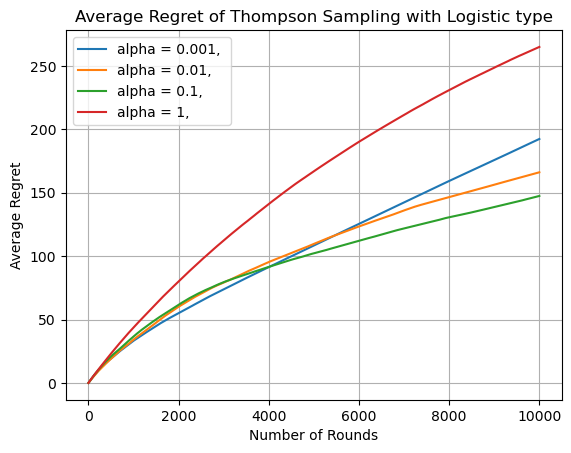

In [5]:
d_values3 = [10]
num_items3 = [30]
alpha_values3 = [0.001, 0.01, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 50

all_average_regrets = run_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3, type= 'logistic')

Total progress:   0%|          | 0/200 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11368.0
Average number of iteration per rounds in calculate.mle:  1.1368
Total number of iterations in calculate.mle :  13798.0
Average number of iteration per rounds in calculate.mle:  1.3798
Total number of iterations in calculate.mle :  10858.0
Average number of iteration per rounds in calculate.mle:  1.0858
Total number of iterations in calculate.mle :  11105.0
Average number of iteration per rounds in calculate.mle:  1.1105
Total number of iterations in calculate.mle :  10908.0
Average number of iteration per rounds in calculate.mle:  1.0908
Total number of iterations in calculate.mle :  11575.0
Average number of iteration per rounds in calculate.mle:  1.1575
Total number of iterations in calculate.mle :  13965.0
Average number of iteration per rounds in calculate.mle:  1.3965
Total number of iterations in calculate.mle :  12170.0
Average number of iteration per rounds in calculate.mle:  1.217
Total number of iterations in calculate.m

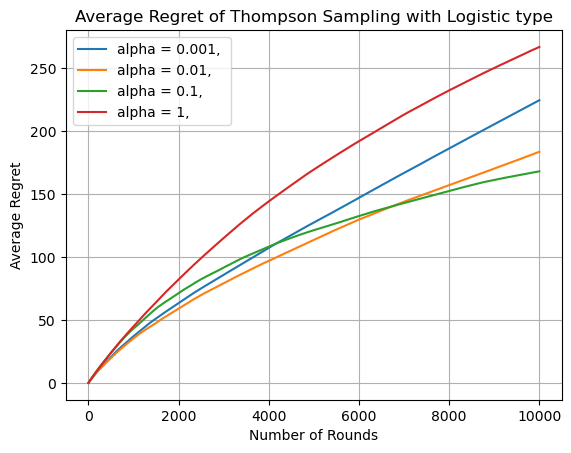

In [6]:
d_values3 = [10]
num_items3 = [50]
alpha_values3 = [0.001, 0.01, 0.1, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 50

all_average_regrets = run_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3, type= 'logistic')

## Comparing GLB TS and Linear TS

### Variation of the number of dimensions

In [4]:
d_values = [3, 10, 33, 50]
num_items = [10]
alpha_values = [0.1]
num_rounds = 10000
sigma_noise = 1.0
nbr_runs = 10

average_regrets_all = run_versus_experiments(d_values, num_items, alpha_values, num_rounds, sigma_noise, nbr_runs)

Experiment 1 out of 8
Experiment 2 out of 8
Experiment 3 out of 8
Experiment 4 out of 8
Experiment 5 out of 8
Experiment 6 out of 8


### Variation of the number of items

Total progress:   0%|          | 0/300 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  11548.0
Average number of iteration per rounds in calculate.mle:  1.1548
Total number of iterations in calculate.mle :  12399.0
Average number of iteration per rounds in calculate.mle:  1.2399
Total number of iterations in calculate.mle :  12614.0
Average number of iteration per rounds in calculate.mle:  1.2614
Total number of iterations in calculate.mle :  11705.0
Average number of iteration per rounds in calculate.mle:  1.1705
Total number of iterations in calculate.mle :  11839.0
Average number of iteration per rounds in calculate.mle:  1.1839
Total number of iterations in calculate.mle :  11860.0
Average number of iteration per rounds in calculate.mle:  1.186
Total number of iterations in calculate.mle :  11008.0
Average number of iteration per rounds in calculate.mle:  1.1008
Total number of iterations in calculate.mle :  11025.0
Average number of iteration per rounds in calculate.mle:  1.1025
Total number of iterations in calculate.m

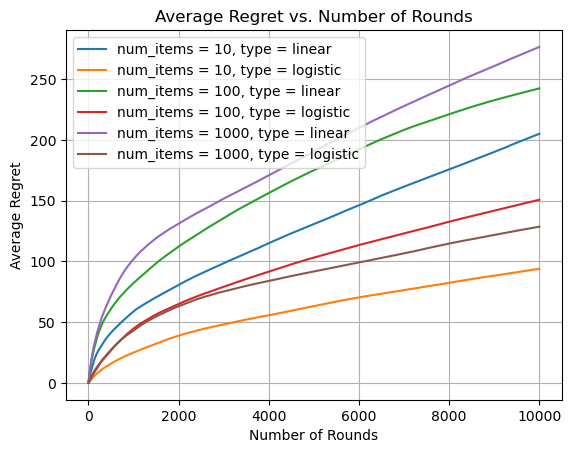

In [3]:
d_values2 = [5]
num_items2 = [10, 100, 1000]
alpha_values2 = [0.1]
num_rounds2 = 10000
sigma_noise2 = 1.0
nbr_runs2 = 50

average_regrets_all = run_versus_experiments(d_values2, num_items2, alpha_values2, num_rounds2, sigma_noise2, nbr_runs2)

### Variation of the number of alphas

Total progress:   0%|          | 0/120 [00:00<?, ?it/s]

Total number of iterations in calculate.mle :  10893.0
Average number of iteration per rounds in calculate.mle:  1.0893
Total number of iterations in calculate.mle :  10760.0
Average number of iteration per rounds in calculate.mle:  1.076
Total number of iterations in calculate.mle :  11184.0
Average number of iteration per rounds in calculate.mle:  1.1184
Total number of iterations in calculate.mle :  11910.0
Average number of iteration per rounds in calculate.mle:  1.191
Total number of iterations in calculate.mle :  11800.0
Average number of iteration per rounds in calculate.mle:  1.18
Total number of iterations in calculate.mle :  11514.0
Average number of iteration per rounds in calculate.mle:  1.1514
Total number of iterations in calculate.mle :  12017.0
Average number of iteration per rounds in calculate.mle:  1.2017
Total number of iterations in calculate.mle :  12136.0
Average number of iteration per rounds in calculate.mle:  1.2136
Total number of iterations in calculate.mle 

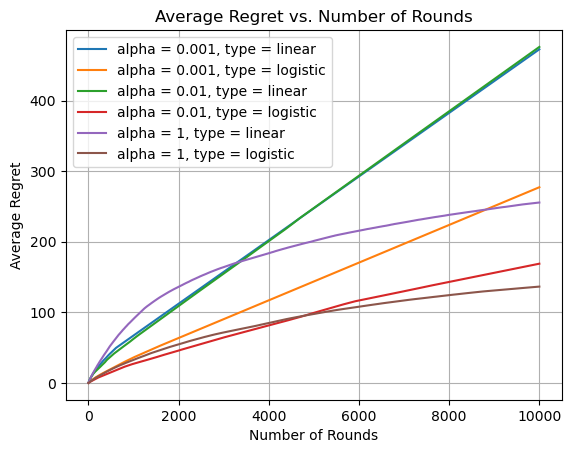

In [4]:
d_values3 = [5]
num_items3 = [10]
alpha_values3 = [0.001, 0.01, 1]
num_rounds3 = 10000
sigma_noise3 = 1.0
nbr_runs3 = 20

average_regrets_all = run_versus_experiments(d_values3, num_items3, alpha_values3, num_rounds3, sigma_noise3, nbr_runs3)